FINAL PROJECT 
# DATA ANALYSING USING TITANIC DATASET 

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing the titanic dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Q1. Fill all the null values in the Age columns (Median)**

In [8]:
df['Age'].fillna(int(df['Age'].median()), inplace=True)
print(df)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.drop(['Cabin'], axis=1, inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

# **Q2. Remove/delete the two null values from the Embarked column.**

In [12]:
df = df.drop(['Embarked'], axis=1)
#remove NaN values
df = df.dropna()

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

# **Q4. Visualize the Pclass who has Survived and Not Survived w.r.t the Gender**

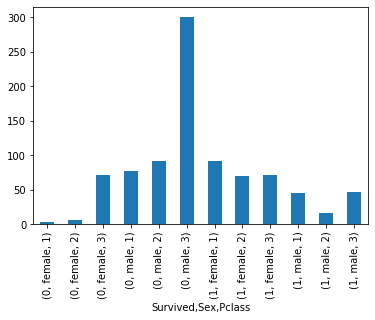

In [32]:
df.groupby(['Survived','Sex','Pclass']).count().Name
df.groupby(['Survived','Sex','Pclass']).count().Name.plot(kind='bar')

# **Q3. Tell the name of the Passanger, who is a female and she has survived, her age was b/w 20 - 30 and they belongs to the 1st class**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


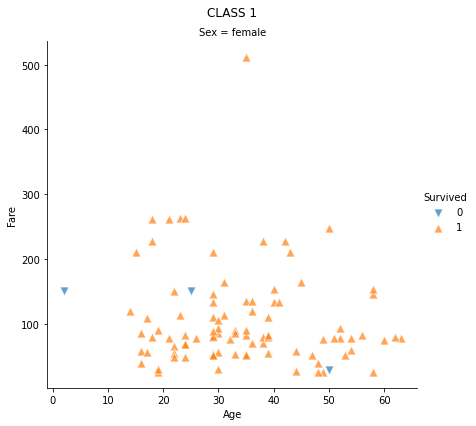

In [41]:
def scatter_plot_class(pclass):
    g = sns.FacetGrid(df[df['Pclass'] == pclass], 
                      col='Sex',
                      col_order=['female'],
                      hue='Survived', 
                      hue_kws=dict(marker=['v', '^']), 
                      size=6)
    g = (g.map(plt.scatter, 'Age', 'Fare', edgecolor='w', alpha=0.7, s=80).add_legend())
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('CLASS {}'.format(pclass))

# plotted separately because the fare scale for the first class makes it difficult to visualize second and third class charts
scatter_plot_class(1)

**Q3. Tell the name of the Passanger, who is a female and she has survived, her age was b/w 20 - 30 and they belongs to the 1st class?**

**Spencer, Mrs. William Augustus (Marie Eugenie)	female	29.0	1 ,who is a female and she has survived and her age was b/w 20 - 30 and she belongs to the 1st class**	

## **THANK YOU!**